In [104]:
import numpy as np
from scipy.stats import norm
from statistics import mean

import matplotlib.pyplot as plt

# 1-D Monte Carlo hopping

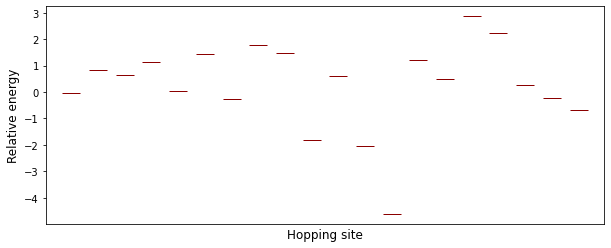

In [119]:
plt.figure(figsize=(10,4))
plt.plot(norm.rvs(scale=2, size=20), '_', ms=18, color='darkred')
plt.xticks([])
plt.xlabel('Hopping site', fontsize=12)
plt.ylabel('Relative energy', fontsize=12)
plt.show()

In my model I am considering fixed lattice sites with varied energy levels. The variation of these energy levels is defined by a Gaussian (normal) distribution. At the moment I am not considering the variantion in the hopping site position.

The functions below assume that the electron which is initialized in the first hopping site will always move forward - it only drifts throughout the device and there is no random-walk movement. 

In [111]:
def initialise_1d(var, size):
    return norm.rvs(scale=var, size=size)

def hop_prob_turns(Z, site, E):
    if Z[site]+E > Z[site+1]:
        return 1
    else:
        return np.round(1/np.exp(-(Z[site+1]-Z[site]-E)), decimals=0)

def transit_time(var, size, E):    
    Z = initialise_1d(var, size)
    time = 0
    x = 0
    while x < len(Z)-1:
        time += hop_prob_turns(Z, x, E)
        x += 1
    return time

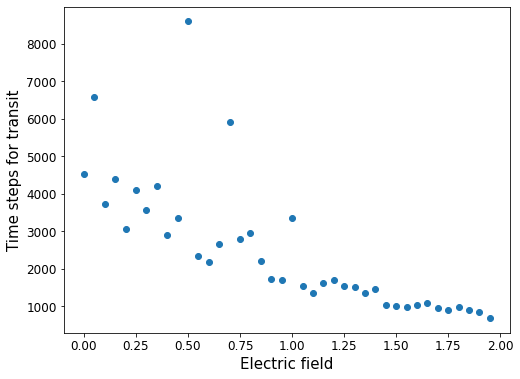

In [113]:
E = np.arange(0,2,0.05)
plt.figure(figsize=(8,6))
plt.plot(E, [mean([transit_time(2, 100, i) for runs in range(100)]) for i in E], 'o')
plt.ylabel('Time steps for transit', fontsize=15)
plt.xlabel('Electric field', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

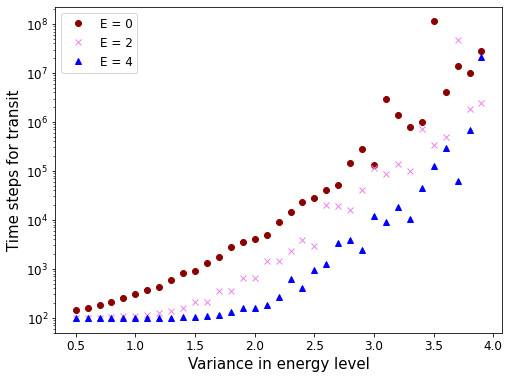

In [116]:
variance = np.arange(0.5,4,0.1)
plt.figure(figsize=(8,6))
plt.plot(variance, [mean([transit_time(i, 100, 0) for runs in range(100)]) for i in variance], 
         'o', color='darkred', label='E = 0')
plt.plot(variance, [mean([transit_time(i, 100, 2) for runs in range(100)]) for i in variance], 
         'x', color='violet', label='E = 2')
plt.plot(variance, [mean([transit_time(i, 100, 4) for runs in range(100)]) for i in variance], 
         '^', color='blue', label='E = 4')
plt.ylabel('Time steps for transit', fontsize=15)
plt.xlabel('Variance in energy level', fontsize=15)
plt.yscale('log')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

# 2-D Monte Carlo hopping

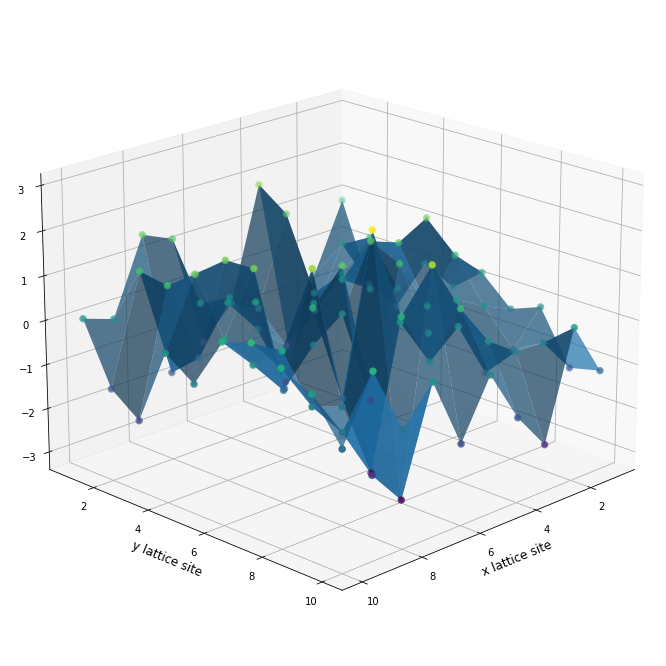

In [78]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
x, y = np.arange(1,11), np.arange(1,11)
X, Y = np.meshgrid(x, y)
Z = norm.rvs(size=100).reshape(10,10)
ax.plot_surface(X, Y, Z, alpha=0.7)
ax.scatter(X, Y, Z, c=Z, linewidth=3.0)
plt.xlabel('x lattice site', fontsize=12)
plt.ylabel('y lattice site', fontsize=12)
ax.view_init(20,45)
plt.show()

In [79]:
def initialize(i, j):
    Z = norm.rvs(size=i*j).reshape(i,j)
    return Z

## to be continued...